# lab01b: Colour and Point Operations

## 1. NumPy

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

![Source Image](./Images/Atrium.jpeg)

## 2. Colour Space Conversion

### Show RGB Channel in Gray

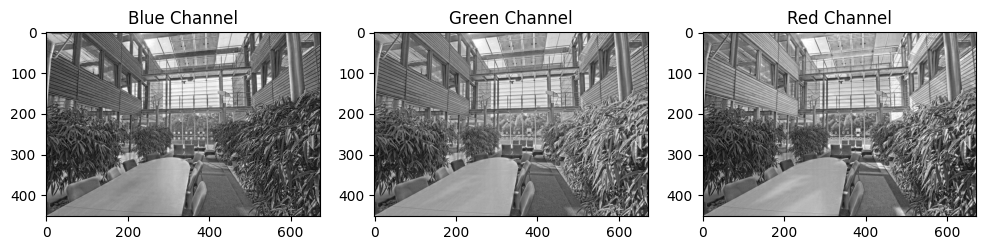

In [4]:
# Read the image
img = cv2.imread("./Images/Atrium.jpeg")

# Split the matrix into individual colour channels
# OpenCV reads images in BGR format rather than RGB
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]

# Display each colour channel
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(blue, cmap="gray")
ax1.set_title('Blue Channel')
ax2.imshow(green, cmap="gray")
ax2.set_title('Green Channel')
ax3.imshow(red, cmap="gray")
ax3.set_title('Red Channel')
plt.show()

### Convert RGB into Grey in 3 ways

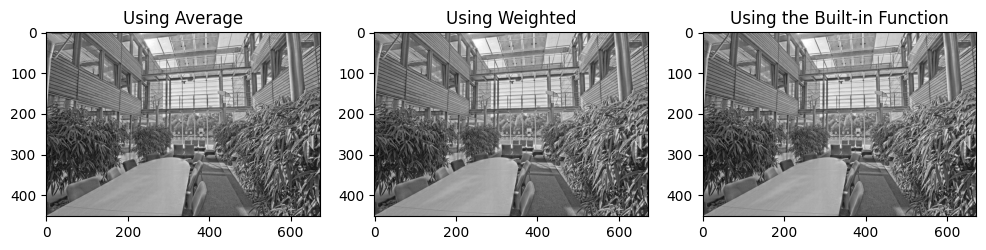

In [3]:
height, width, channels = img.shape
int_img = img.astype(int)

# Converts the image to greyscale by calculating the average of the RGB values at each pixel
avg_grey = np.empty((height, width), dtype="uint8") # create empty list with `height` rows and `width` cols
for y in range(height):
    for x in range(width):
        b, g, r = int_img[y, x]
        avg_grey[y, x] = int((b+g+r)/3)

# Using NumPy
# axis = 0 : x-column, axis = 1: row, axis = z
# 对于颜色图像数据，如形状为(height, width, channels)的数组
# 设置axis=2时，你可以沿颜色通道维度进行操作
# avg_grey = np.mean(img, axis=2)
# avg_grey = avg_grey.astype("uint8")

# Converts the image to greyscale by applying the weighted formula in the lecture
weight_grey = np.empty((height, width), dtype="uint8")
for y in range(height):
    for x in range(width):
        b, g, r = int_img[y, x]
        weight_grey[y, x] = int(0.3 * r + 0.59 * g + 0.11 * b)

# Using NumPy
# def weight_func(x):
#     return 0.3 * x[2] + 0.59 * x[1] + 0.11 * x[0]

# weight_grey = np.apply_along_axis(weight_func, 2, img)
# weight_grey = weight_grey.astype("uint8")

# Converts the image to greyscale by using the built-in opencv function
function_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(avg_grey, cmap="gray")
ax1.set_title('Using Average')
ax2.imshow(weight_grey, cmap="gray")
ax2.set_title('Using Weighted')
ax3.imshow(function_grey, cmap="gray")
ax3.set_title('Using the Built-in Function')
plt.show()

### Show the 'greenness' value

In [5]:
# Computes the greenness of the image
greenness = np.empty((height, width), dtype="uint8")
for y in range(height):
    for x in range(width):
        b, g, r = int_img[y,x]
        greenness[y, x] = abs(g - (r + b)/2)

# Using NumPy
# def greenness_func(x):
#     return abs(x[1] - (x[2] + x[0]) / 2)

# greenness = np.apply_along_axis(greenness_func, 2, img.astype(int))
# greenness = greenness.astype("uint8")

# Displays the results
cv2.imshow("Greenness", greenness)
cv2.waitKey(0)

32

### Convert RGB into HSV

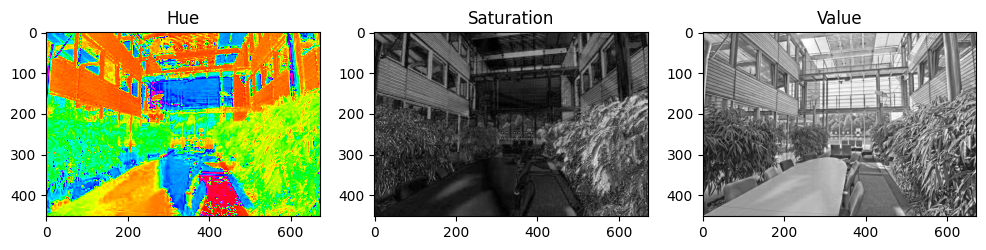

In [6]:
# Convert the image to hsv
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the matrix into the individual hsv channels
hue = hsv_img[:, :, 0]
sat = hsv_img[:, :, 1]
val = hsv_img[:, :, 2]

# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(hue, cmap="hsv")
ax1.set_title('Hue')
ax2.imshow(sat, cmap="gray")
ax2.set_title('Saturation')
ax3.imshow(val, cmap="gray")
ax3.set_title('Value')
plt.show()

## 3. Point Image Processing

### Gamma Correction

$$
p' = \frac{p^{\gamma}}{255} * 255 
$$

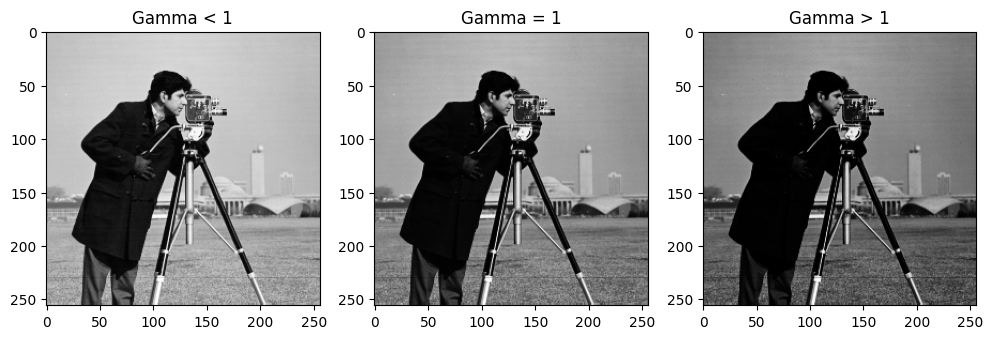

In [9]:
# Read a greyscale image
img = cv2.imread("./Images/cameraman.tif", cv2.IMREAD_UNCHANGED)

# Apply the gamma adjustment
gamma = 0.5
below_one = ((img / 255) ** gamma) * 255
below_one = below_one.astype("uint8")

gamma = 1
equal_one = ((img / 255) ** gamma) * 255
equal_one = equal_one.astype("uint8")

gamma = 1.5
above_one = ((img / 255) ** gamma) * 255
above_one = above_one.astype("uint8")

# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(below_one, cmap="gray")
ax1.set_title('Gamma < 1')
ax2.imshow(equal_one, cmap="gray")
ax2.set_title('Gamma = 1')
ax3.imshow(above_one, cmap="gray")
ax3.set_title('Gamma > 1')
plt.show()

### Negate, Gain and Bias

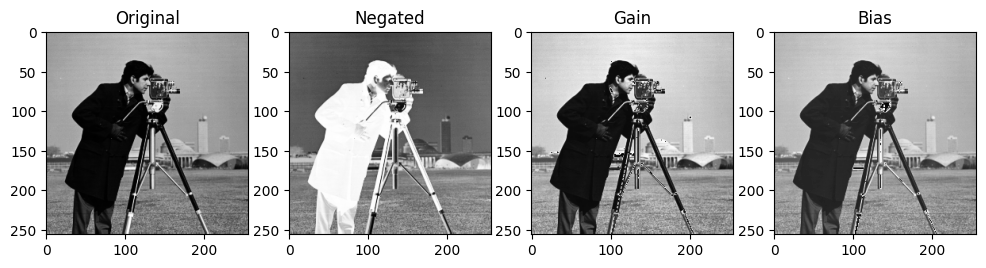

In [10]:
# Negate the image
negate = 255 - img

# Gain
img_float = img.astype(float)
gain = img_float * 1.25
gain = gain.astype("uint8")

# Bias
img_int = img.astype(int)
bias = img_int + 25
bias = bias.astype("uint8")

# Display the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 6))
ax1.imshow(img, cmap="gray")
ax1.set_title("Original")
ax2.imshow(negate, cmap="gray")
ax2.set_title('Negated')
ax3.imshow(gain, cmap="gray")
ax3.set_title('Gain')
ax4.imshow(bias, cmap="gray")
ax4.set_title('Bias')
plt.show()
